# Conducting a What-if analysis using pyhton

Simon, a data analyst, earns a monthly salary of £30,000. With no savings, Simon is curious to know when he will be able to retire. A friend suggested that he needs approximately £1,000,000 to retire if he gets a yearly salary increase. We'll create and test a model that will allow us to calculate how many years it would take for Simon's preferred level of savings to be reached. The model essentially tracks wages and savings and maintains a constant growth rate (which includes both the cost-of-living raises and regular wage increases tied to promotions). The model we'll use for the client consists of the following sections:

- **Input**: The default inputs for the model:
  - starting_salary (int) = 30,000
  - promos_every_n_years (int) = 3
  - cost_of_living_raise (float) = 0.025
  - promo_raise (float) = 0.15
  - savings_rate (float) = 0.20
  - interest_rate (float) = 0.07
  - desired_cash (int) = 1,000,000
- **Wages**: the wage per year, considering the cost of living and promotions
- **Wealth**: the wealth accrued per year, considering a constant saving and investment rate
- **Retirement**: determines years to retirement from the wealth over time – the main output from the model.

## 1. Preparing workstation

In [1]:
# Install Python Sensitivity Analysis
!pip install sensitivity

# This might take some time to install

In [3]:
# Define Classes to contain and encapsulate data.
from dataclasses import dataclass
import pandas as pd

# Import in-built module for generating random numbers.
import random

# Display output inline.
%matplotlib inline

# Import to replicate a nested loop over the input values.
from sensitivity import SensitivityAnalyzer #This module serve to conduct sensitivity analysis

## 2. Specify Inputs

start by focusing on our inputs and creating:

 - a **class** to manage the data
 - an **instance** of the new class that contains the default inputs.

As we move into more advanced programming and analytics, take your time and make sure you understand each step. Take note of any questions that come up, and remember to add comments to the code snippets that are clear and descriptive – your future self will thank you when you need to review your efforts. Here's what the code looks like:

In [4]:
# Create a DataFrame consisting of various classes using python's 'dataclass()'
# module and object oriented programming (OPP).
@dataclass

class ModelInputs:
    # Define the class and specify the default inputs.
    starting_salary: int = 30000
    promos_every_n_years: int = 3
    cost_of_living_raise: float = 0.025
    promo_raise: float = 0.15
    saving_rate: float = 0.20
    interest_rate: float = 0.07
    desired_cash: int = 1000000

# Create an instance of the new class with the default inputs
model_data = ModelInputs()

# print the results
model_data

ModelInputs(starting_salary=30000, promos_every_n_years=3, cost_of_living_raise=0.025, promo_raise=0.15, saving_rate=0.2, interest_rate=0.07, desired_cash=1000000)

## 3. Calculate Wages 

To calculate the wages, we'll assume that wages grow at a constant rate (based on the rising cost of living) and that further increases are due to a promotion or change of roles or position.

![altarnatvie text](https://eu-west-1.cdn.h5p.com/orgs/1291376046658529117/organization/content/1291783164063264507/images/image-635a768e7c53e.png)



In [9]:
# Specify the definition keyword and the function name as wages_year()
def wages_year(data: ModelInputs, year):
    # Every n years we have a promotion, so dividing the years and 
    # taking out the decimals gets the number of promotions.
    num_promos = int(year/data.promos_every_n_years)
    
    # This is the formula above implemented in python
    salary_t = data.starting_salary * (1+data.cost_of_living_raise)\
    ** year * (1+data.promo_raise) ** num_promos 
    return salary_t
    
# Show the first four salaries in the range and 
# print the results using the f-string.
for i in range(4):
    year = i + 1
    salary = wages_year(model_data,year)
    print(f'The wage at year {year} is £ {salary:,.0f}.')

The wage at year 1 is £ 30,750.
The wage at year 2 is £ 31,519.
The wage at year 3 is £ 37,153.
The wage at year 4 is £ 38,082.


## 4. Calculate wealth

Next, we have to calculate the wealth over time. Here, we'll apply the savings rate to the earned salary to calculate cash saved, and then we'll apply a set investment rate to the accumulated wealth. The equations we'll use to get the amount of cash saved are displayed in the infographic. Select the icons to learn more.

![alternatvie text](https://eu-west-1.cdn.h5p.com/orgs/1291376046658529117/organization/content/1291783164696588417/images/image-635a7a1a67579.png)

creating the two equestions in python with user-defined functions 

In [16]:
# Calculate the cash saved within a given year by first 
# calculating the salary at that year then applying the savings rate.

def cash_saved_during_year(data: ModelInputs, year):
    salary = wages_year(data, year)
    cash_saved = salary * data.saving_rate
    return cash_saved

# Calculate the accumulated wealth for a given year based
# on previous wealth, the investment rate, and cash saved during the year.

def wealth_year(data: ModelInputs, year, prior_wealth):
    cash_saved = cash_saved_during_year(data, year)
    wealth = prior_wealth * (1 + data.interest_rate)+ cash_saved
    return wealth

# Start with no cash saved.
prior_wealth = 0  
for i in range(4):
    year = i + 1
    wealth = wealth_year(model_data, year, prior_wealth)
    print(f'The accumulated wealth at year {year} is £{wealth:,.0f}.')
    
    # Set next year's prior wealth to this year's wealth:
    prior_wealth = wealth


The accumulated wealth at year 1 is £6,150.
The accumulated wealth at year 2 is £12,884.
The accumulated wealth at year 3 is £21,217.
The accumulated wealth at year 4 is £30,318.


we can see how the wealth increased over four years. if you extend the range to 10 years, noticing a substantial growth in wealth following a promotion.

## 5. Calculate Retirement

Retirement is reached when a set amount of cash has been saved – in this instance, over £1,000,000 million. We managed to find the wages for every year and the accrued yearly wealth. We'll use a while loop to run through each year, starting with no cash saved.

In [17]:
def years_to_retirement(data: ModelInputs, print_output=True):
    # Start with no cash saved.
    prior_wealth = 0  
    wealth = 0
    # The ‘year’ becomes ‘1’ on the first loop.
    year = 0  
   
    if print_output:
        print('Wealths over time:')
    while wealth < data.desired_cash:
        year = year + 1
        wealth = wealth_year(data, year, prior_wealth)
        if print_output:
            print(f'The accumulated wealth at year {year} is £{wealth:,.0f}.')
            # Set next year's prior wealth to this year's wealth.
        prior_wealth = wealth  
       
    # Now we have run the while loop, the wealth must be >= desired_cash 
    # (whatever last year was set is the years to retirement), which we can print.
    if print_output:
        # \n makes a blank line in the output.
        print(f'\nRetirement:\nIt will take {year} years to retire.')  
    return year

years = years_to_retirement(model_data)

Wealths over time:
The accumulated wealth at year 1 is £6,150.
The accumulated wealth at year 2 is £12,884.
The accumulated wealth at year 3 is £21,217.
The accumulated wealth at year 4 is £30,318.
The accumulated wealth at year 5 is £40,247.
The accumulated wealth at year 6 is £52,267.
The accumulated wealth at year 7 is £65,358.
The accumulated wealth at year 8 is £79,601.
The accumulated wealth at year 9 is £96,569.
The accumulated wealth at year 10 is £115,010.
The accumulated wealth at year 11 is £135,033.
The accumulated wealth at year 12 is £158,599.
The accumulated wealth at year 13 is £184,167.
The accumulated wealth at year 14 is £211,887.
The accumulated wealth at year 15 is £244,197.
The accumulated wealth at year 16 is £279,206.
The accumulated wealth at year 17 is £317,114.
The accumulated wealth at year 18 is £360,957.
The accumulated wealth at year 19 is £408,411.
The accumulated wealth at year 20 is £459,741.
The accumulated wealth at year 21 is £518,729.
The accumulat

## 6. Visualise the output

In [25]:
def years_to_retirement(data):
    # Start with no cash saved.
    prior_wealth = 0  
    wealth = 0
    # The ‘year’ becomes ‘1’ on the first loop.
    year = 0
    
    # Set up output to be displayed as a DataFrame as tuples.
    df_data_tups = []
    while wealth < data.desired_cash:
        year = year + 1
        wealth = wealth_year(data, year, prior_wealth)
        
        # Set next year's prior wealth to this year's wealth.
        prior_wealth = wealth  
        
        # Save the results in a tuple for later building the DataFrame.
        df_data_tups.append((year, wealth))
       
    # Now we have run the while loop, so wealth must be >= desired_cash. 
    # Create the DataFrame.
    df = pd.DataFrame(df_data_tups, columns=['Year', 'Wealth'])
    
    return df

# Save the function results into the DataFrame.
results_df = years_to_retirement(model_data)

# View the DataFrame.
results_df.head()

,Year,Wealth
0,1,6150.000000
1,2,12884.250000
2,3,21216.692812
3,4,30318.170255
4,5,40247.158841


<AxesSubplot:xlabel='Year'>

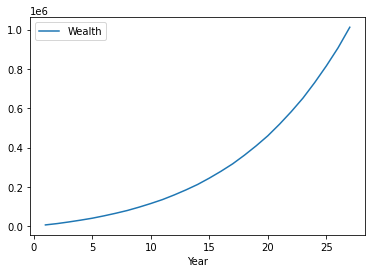

In [26]:
# Visualise wealth change over time.
results_df.plot('Year' , 'Wealth')
